In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from IPython.core.interactiveshell import InteractiveShell
"""
win下显示所有结果与中文
"""
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

'\nwin下显示所有结果与中文\n'

In [18]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Loan_Default_Prediction/Data")
#点击下方连接，得到授权码，输入到下方空白栏出，授权使用云盘中的数据

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
train = pd.read_csv('./train.csv',index_col='id')
testA = pd.read_csv('./testA.csv',index_col='id')
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)
data = pd.concat([train, testA], axis=0, ignore_index=True)

Train data shape: (800000, 46)
TestA data shape: (200000, 47)


In [20]:
train.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  object 
 5   subGrade            800000 non-null  object 
 6   employmentTitle     799999 non-null  float64
 7   employmentLength    753201 non-null  object 
 8   homeOwnership       800000 non-null  int64  
 9   annualIncome        800000 non-null  float64
 10  verificationStatus  800000 non-null  int64  
 11  issueDate           800000 non-null  object 
 12  isDefault           800000 non-null  int64  
 13  purpose             800000 non-null  int64  
 14  postCode            799999 non-null  float64
 15  regionCode          800000 non-nul

**分类指标评价计算示例**

In [22]:
## 混淆矩阵
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('混淆矩阵:\n',confusion_matrix(y_true, y_pred))

混淆矩阵:
 [[1 1]
 [1 1]]


In [23]:
## accuracy
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('ACC:',accuracy_score(y_true, y_pred))

ACC: 0.5


In [24]:
## Precision,Recall,F1-score
from sklearn import metrics
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('Precision',metrics.precision_score(y_true, y_pred))
print('Recall',metrics.recall_score(y_true, y_pred))
print('F1-score:',metrics.f1_score(y_true, y_pred))

Precision 0.5
Recall 0.5
F1-score: 0.5


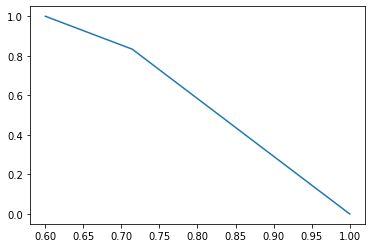

In [25]:
## P-R曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
plt.plot(precision, recall)

Text(0.5, 1.0, 'ROC')

Text(0, 0.5, 'TPR')

Text(0.5, 0, 'FPR')

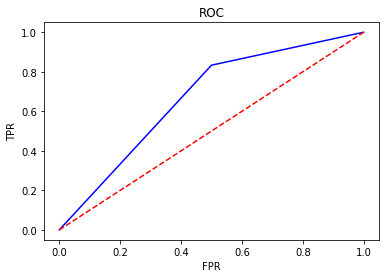

In [26]:
## ROC曲线
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [27]:
## AUC
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:',roc_auc_score(y_true, y_scores))

AUC socre: 0.75


In [28]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.5238095238095237


**拓展知识——评分卡**

In [29]:
#评分卡 不是标准评分卡
def Score(prob,P0=600,PDO=20,badrate=None,goodrate=None):
    P0 = P0
    PDO = PDO
    theta0 = badrate/goodrate
    B = PDO/np.log(2)
    A = P0 + B*np.log(2*theta0)
    score = A-B*np.log(prob/(1-prob))
    return score

In [30]:
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea

numerical_fea = list(train.select_dtypes(exclude=['object']).columns)
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data,numerical_fea)

print("numerical_serial_fea：",numerical_serial_fea)
print("numerical_noserial_fea：",numerical_noserial_fea)

numerical_serial_fea： ['loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']
numerical_noserial_fea： ['term', 'homeOwnership', 'verificationStatus', 'isDefault', 'initialListStatus', 'applicationType', 'policyCode', 'n11', 'n12']


数据分析

In [31]:
train.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.0,759730.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,1.0,0.511932,3.642330,5.642648,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,7941.474040,0.0,1.333266,2.246825,3.302810,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,5000.000000,3.000000,7.390000,157.590000,54.000000,0.000000,3.400000e+04,0.000000,0.000000,0.000000,37.000000,3.000000,7.280000,0.000000,665.000000,669.000000,6.000000,0.000000,0.000000,3.014000e+03,18.200000,11.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,6.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
20%,6500.000000,3.000000,8.900000,216.750000,188.000000,0.000000,4.200000e+04,0.000000,0.000000,0.000000,76.000000,8.000000,10.500000,0.000000,670.000000,674.000000,7.000000,0.000000,0.000000,5.019000e+03,29.100000,15.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,5.000000,8.000000,3.000000,7.000000,0.000000,0.000000,0.000000,1.000000
30%,8675.000000,3.000000,10.490000,273.000000,841.000000,0.000000,5.000000e+04,0.000000,0.000000,0.000000,119.000000,8.000000,13.020000,0.000000,675.000000,679.000000,8.000000,0.000000,0.000000,6.878000e+03,37.400000,18.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,4.000000,4.000000,3.000000,5.000000,4.000000,6.000000,10.000000,4.000000,8.000000,0.000000,0.000000,0.000000,1.000000
40%,10000.000000,3.000000,11.530000,324.300000,2627.000000,0.000000,5.700000e+04,1.000000,0.000000,0.000000,157.000000,12.000000,15.320000,0.000000,680.000000,684.000000,9.000000,0.000000,0.000000,8.872000e+03,45.000000,20.000000,0.000000,0.000000,0.000000,1.0,0.000000,3.000000,4.000000,4.000000,4.000000,6.000000,5.000000,6.000000,11.000000,4.000000,9.000000,0.000000,0.000000,0.000000,1.000000
50%,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,

缺失值统计

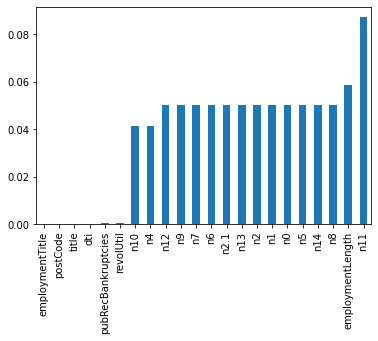

In [32]:
# nan可视化
missing = train.isnull().sum()/len(train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [33]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)[:23]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
42,n11,5,8.719000,91.210250,float64
7,employmentLength,11,5.849875,32.844125,object
39,n8,102,5.033875,5.601000,float64
45,n14,31,5.033750,23.437625,float64
34,n2.1,50,5.033750,14.651375,float64
44,n13,28,5.033750,89.516375,float64
43,n12,5,5.033750,94.664375,float64
31,n0,39,5.033750,72.428375,float64
32,n1,33,5.033750,20.376000,float64
40,n9,44,5.033750,14.766750,float64


异常值统计

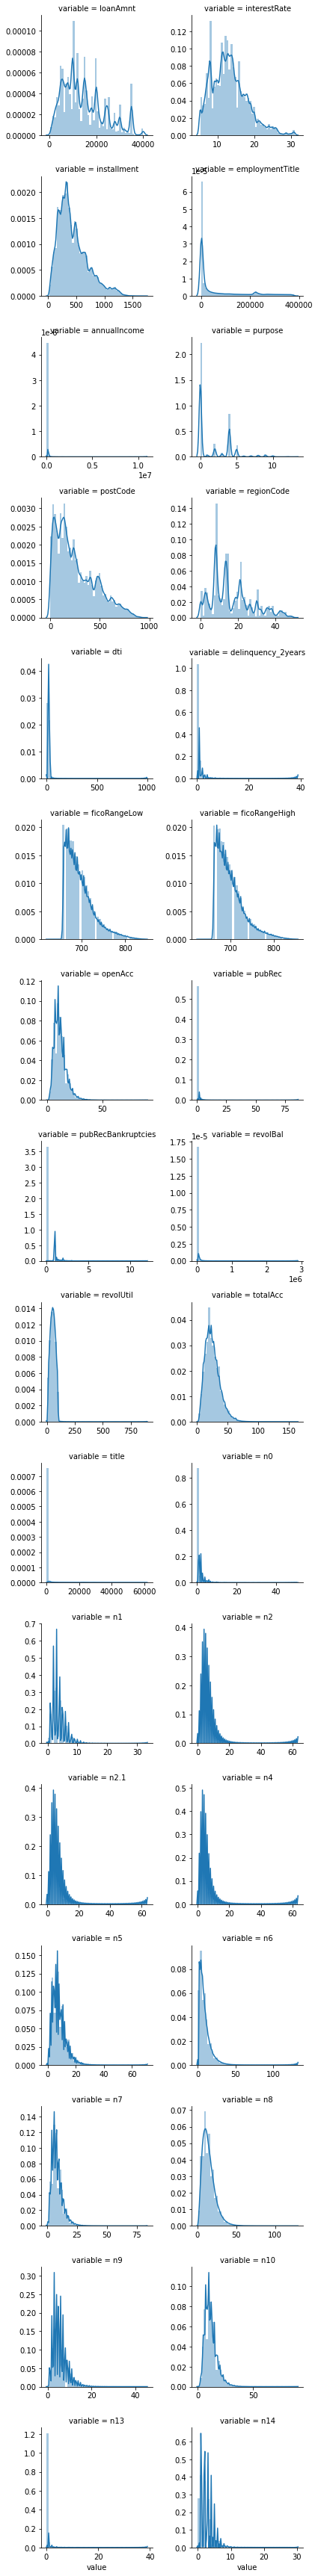

In [35]:
#每个数字特征得分布可视化
f = pd.melt(data, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [37]:
print('峰度(Kurtosis): ', train['n0'].kurt())
print('偏度(Skewness): ', train['n0'].skew())

峰度(Kurtosis):  46.53290236504996
偏度(Skewness):  5.1069085651560036


数据分布情况

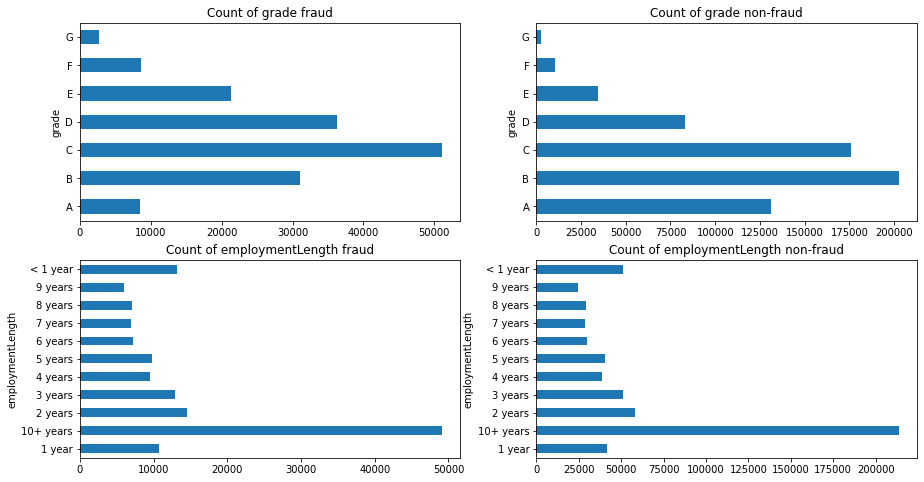

In [38]:
train_loan_fr = data.loc[data['isDefault'] == 1]
train_loan_nofr = data.loc[data['isDefault'] == 0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')
plt.show()

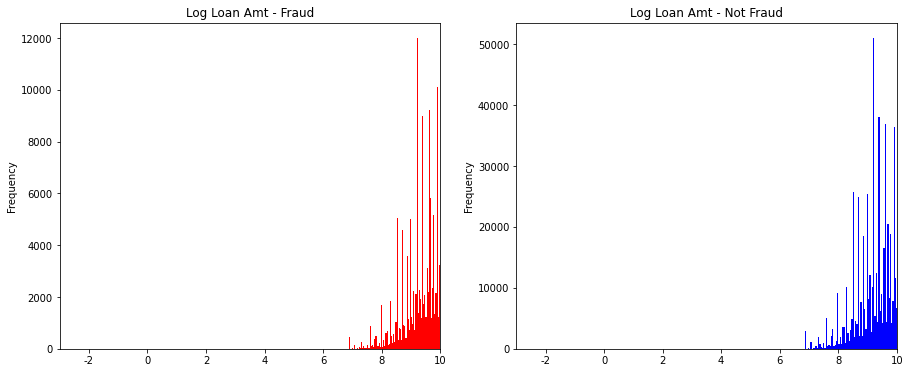

In [41]:
# 查看连续型变量在不同y值上的分布：
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data.loc[data['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
data.loc[data['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)